In [1]:
# librerías a utilizar
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# cargamos los datos
events = pd.read_csv('events.csv', low_memory = False)
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# busco los principales OS
os_events = events.groupby('operating_system_version').agg({'event':'count'}).sort_values(by='event',ascending = False)
os_events.reset_index(inplace = True)
os_events.head()

,operating_system_version,event
0,Windows 7,19675
1,Windows 10,17110
2,Android 7,9964
3,Android 6.0.1,7805
4,Android 6,6871


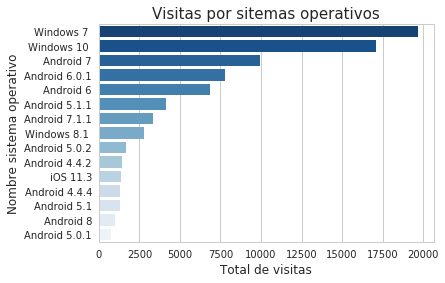

In [21]:
g = sns.barplot(x=os_events.event, y=os_events.operating_system_version[:15], palette=sns.color_palette('Blues_r', 15))
g.set_title("Visitas por sitemas operativos", fontsize=15)
g.set_xlabel("Total de visitas", fontsize=12)
g.set_ylabel("Nombre sistema operativo", fontsize=12);

In [5]:
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


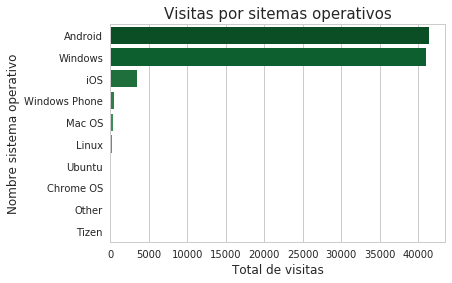

In [20]:
events['operating_system_name'] = events['operating_system_version'].str.split(' ').str[0]
events['operating_system_name'] = np.where(events['operating_system_version'].str.split(' ').str[1]=='Phone', events['operating_system_name'] + ' Phone', events['operating_system_name'])
events['operating_system_name'] = np.where(events['operating_system_version'].str.split(' ').str[1]=='OS', events['operating_system_name'] + ' OS', events['operating_system_name'])
name_os_events = events.groupby('operating_system_name').agg({'event':'count'})
name_os_events = name_os_events.sort_values(by='event',ascending = False)
name_os_events.reset_index(inplace=True)

g = sns.barplot(x=name_os_events.event, y=name_os_events.operating_system_name, ci=None,palette=sns.color_palette('Greens_r', 15))
g.set_title("Visitas por sitemas operativos", fontsize=15)
g.set_xlabel("Total de visitas", fontsize=12)
g.set_ylabel("Nombre sistema operativo", fontsize=12);

In [7]:
# buscamos los tipos de navegador usados
browser_events = events.groupby('browser_version').agg({'event':'count'}).sort_values(by='event',ascending = False)
browser_events.reset_index(inplace = True)
browser_events.head()

,browser_version,event
0,Chrome 66.0,22611
1,Chrome Mobile 66.0,17513
2,Chrome 65.0,6635
3,Chrome Mobile 65.0,5665
4,Chrome Mobile 64.0,3083


In [8]:
# separo entre mobile y no-mobile
browser_events['is_mobile'] = browser_events['browser_version'].str.contains("Mobile")
browser_events.head()

,browser_version,event,is_mobile
0,Chrome 66.0,22611,False
1,Chrome Mobile 66.0,17513,True
2,Chrome 65.0,6635,False
3,Chrome Mobile 65.0,5665,True
4,Chrome Mobile 64.0,3083,True


In [9]:
# cantidad de mobiles vs no-mobiles
mobile = browser_events.groupby('is_mobile').agg({'event':'sum'})
mobile.reset_index(inplace = True)
mobile

,is_mobile,event
0,False,46496
1,True,40882


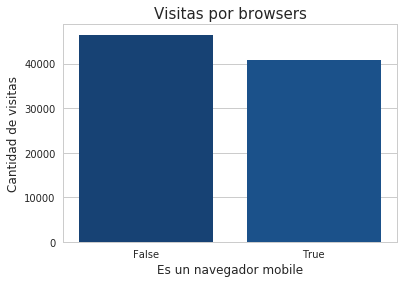

In [19]:
g = sns.barplot(x=mobile.is_mobile, y=mobile.event,palette=sns.color_palette('Blues_r', 15))
g.set_title("Visitas por browsers", fontsize=15)
g.set_xlabel("Es un navegador mobile", fontsize=12)
g.set_ylabel("Cantidad de visitas", fontsize=12);